# Comparison between custom Random Forest and sklearn Random Forest

in this Notebook we'll compare the performances on <a href='https://www.kaggle.com/c/GiveMeSomeCredit/data#_=_'>this</a> credit scoring dataset from Kaggle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from ensemble import RandomForestClassifierCustom
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [2]:
def impute_nan_with_median(table):
    for col in table.columns:
        table[col]=table[col].fillna(table[col].median())
    return table

In [3]:
data=pd.read_csv('data/credit_scoring_data.csv', sep=',')
table=impute_nan_with_median(data)
table.drop(columns = 'Unnamed: 0', inplace = True)
features = table.columns[1:]
X=table.drop(columns='SeriousDlqin2yrs')
y=table['SeriousDlqin2yrs']  #target
X=np.array(X)
y=np.array(y)

In [4]:
rd = RandomForestClassifierCustom(n_estimators=10)
rd.fit(X, y)

RandomForestClassifierCustom(criterion='gini', max_depth=None, max_features=3,
                             n_estimators=10, n_jobs=1, random_state=None)

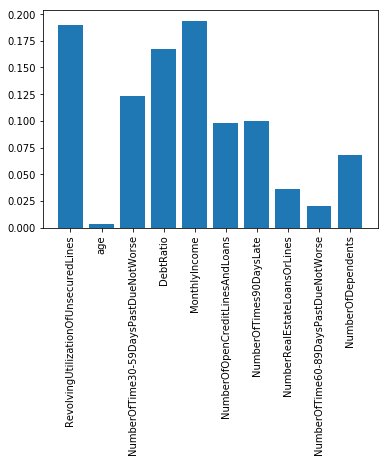

In [5]:
plt.bar(features,rd.mean_decrease_accuracy())
plt.xticks(rotation = 90)
plt.show()

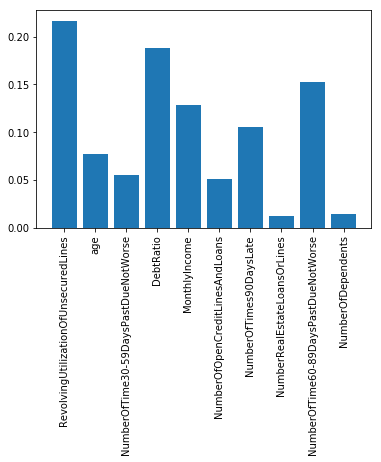

In [6]:
plt.bar(features,rd.feature_importances_())
plt.xticks(rotation = 90)
plt.show()

In [7]:
rd = RandomForestClassifier(n_estimators=10)
rd.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

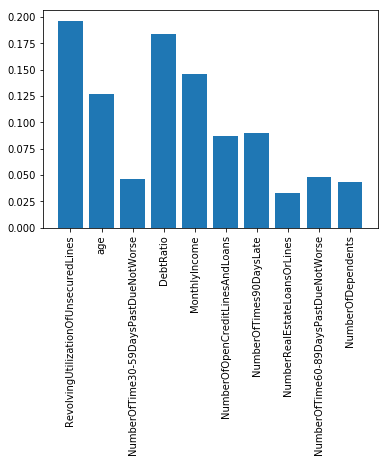

In [8]:
plt.bar(features,rd.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

In [9]:
%%time
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=48)
rd=RandomForestClassifier(n_estimators = 10, random_state=48, n_jobs=6)
gridrd=GridSearchCV(estimator=rd,param_grid={'max_depth':range(3,10),
                                             'max_features':range(3,10)},
                  scoring='roc_auc',cv=skf,verbose=1)

gridrd.fit(X,y)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:  2.9min finished


Wall time: 2min 52s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=48, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=6,
                                              oob_score=False, random_state=48,
                                              verbose=0, warm_start=False),
 

In [10]:
print(gridrd.best_params_)
print(gridrd.best_score_)

{'max_depth': 9, 'max_features': 4}
0.8615113445646081


In [11]:
%%time
rd_custom=RandomForestClassifierCustom(n_estimators=10, random_state=48, n_jobs=6)
gridrd_custom=GridSearchCV(estimator=rd_custom,param_grid={'max_depth':range(3,10),
                                             'max_features':range(3,10)},
                  scoring='roc_auc',cv=skf,verbose=0)

gridrd_custom.fit(X,y)

Wall time: 9min 17s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=48, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifierCustom(criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    n_estimators=10, n_jobs=6,
                                                    random_state=48),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(3, 10),
                         'max_features': range(3, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [12]:
print(gridrd_custom.best_params_)
print(gridrd_custom.best_score_)

{'max_depth': 8, 'max_features': 7}
0.8608379343554647
